# Lab 6: Some more Python, Poisson distribution and exponential distribution

Like the previous lab, we want to put all of our imported packages towards the top of the lab in a cell that's easy to run as needed. This way we have access to all the methods we need right from the start.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
print ("Modules Imported!")

Modules Imported!


## Poisson distribution as limit of binomial distribution

There is yet another important piece to this puzzle, and that is the Poisson distribution. The Poisson distribution has a single parameter $\lambda$ and a probability mass function given by: $p(k) = \frac{e^{-\lambda}\lambda^k}{k!}$ for $k\geq 0.$ The parameter $\lambda$ represents a mean such as the number of hits of a website in one minute, or the number of mispelled words in a document. Thus $p(k)$ represents the probability the number of events occuring is $k$ given that the average number events that occur is $\lambda$. The Poisson distribution is frequently used because it is a good approximation for the binomial distribution when $n$ is large, $p$ is small, and $np \approx \lambda$.  It is simpler than the binomial; it only has one parameter and it doesn't involve binomial coefficients. Let's say you create a website and that your website gets on average of 1200 hits per day. This is set up as a Poisson distribution where $\lambda = 1200$, but we can also model this as a binomial. If we were to break down the day into minute increments then the probability that a hit occurs in any given minute is $p = \frac{1200}{24*60} = \frac{5}{6}$ and there are $n = 24*60 = 1440$ minutes in a day. Below is a graph of this binomial approximation of the Poisson.

p = 0.8333333333333334


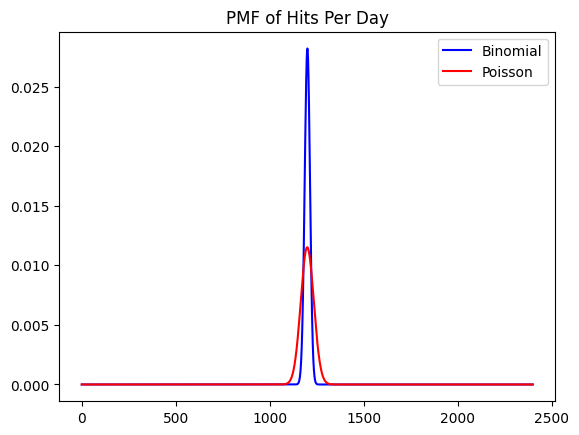

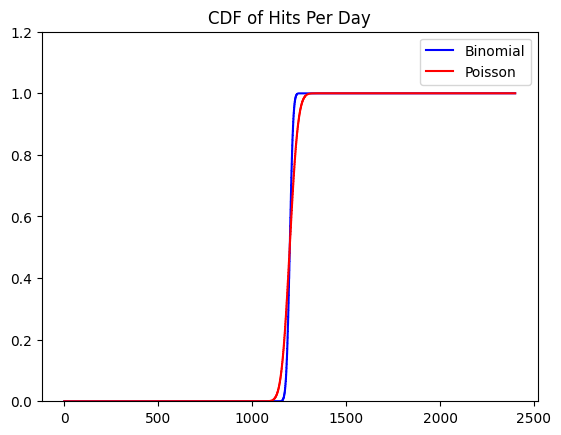

In [2]:
lamb =1200 #Average number of hits per day
n = 60*24. #Number of minutes in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

k = range(2*lamb)
plt.plot(k,st.binom.pmf(k,n,p), 'b', label = 'Binomial')
plt.plot(k,st.poisson.pmf(k,lamb), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,st.binom.cdf(x,n,p), 'b', label = 'Binomial')
plt.plot(x,st.poisson.cdf(x,lamb), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

These two distributions don't really look that close to each other. Why is that? In order for this approximation to be accurate, we require that $n$ be large, $p$ be small, and $np \approx \lambda$. Here $n$ is fairly large but $p$ is not close to zero at all.  The variance of the Poisson(1200) distribution is 1200, while the variance of the Binom(1440,5/6) distribution is only 1440*(5/6)*(1/6)=200. Clearly, we haven't broken the day up into small enough increments.  So let's now break it up into seconds.

p = 0.013888888888888888


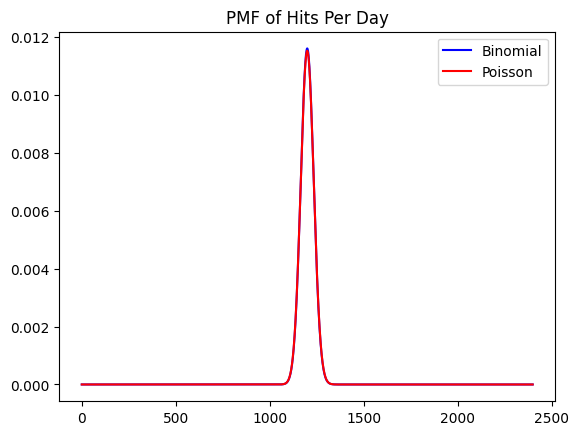

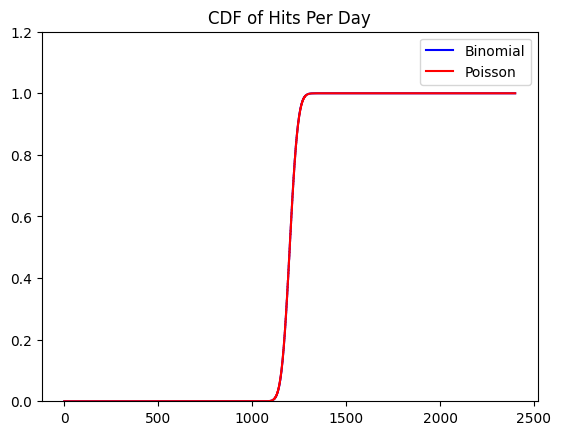

In [3]:
lamb = 1200 #Average number of hits per day
n = 60*60*24. #Number of seconds in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

X = st.binom(n,p)
Y = st.poisson(lamb)

k = range(2*lamb)
plt.plot(k,X.pmf(k), 'b', label = 'Binomial')
plt.plot(k,Y.pmf(k), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,X.cdf(x), 'b', label = 'Binomial')
plt.plot(x,Y.cdf(x), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

Now our approximation is so close that the two distributions are almost indistinguishable from each other. If we kept increasing n and decreasing p we would find that the approximation continues to improve. So, symbolically, $\lim_{n\to \infty, p\to  0, np \to \lambda} Binom(n,p) = Pois(\lambda).$  If you encounter a binomial variable with large $n$ and small $p,$ it may be easier to calculate probabilities based on the Poisson distribution.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** While working on a new research project, I have a probability of 𝑝=.016 of successfully analyzing a dataset during any given minute. Suppose there are 330 datasets that need to be analyzed, and I have 10 weeks to complete the project (assuming I work 35 hours per week). What's the probability that I will complete the project before the deadline? Equivalently, what is the probability that I analyze at least 330 datasets? To answer this question, do the following:
<html>
    <body>
        <ol>
            <li> Create a binomial variable X to represent the number of datasets I analyze (for this and other parts of the
            problem, assume I keep working at the same rate if I finish analyzing 330 datasets).</li>
            <li> Create a Poisson variable Y to represent the same number, using the Poisson approximation.
            Make sure to print out what $\lambda$ is.</li>
            <li> Find the probability of my success (i.e. analyzing at least 330 datasets) using the CDFs of each RV. Do they agree?</li>
            <li> Find the probability that I analyze exactly 330 datasets using the pmf of each RV.  Do they agree? </li>
        </ol>
    </body>
</html>

In [4]:
########Student Answer#############
p = 0.016
n = int(10 * 35 * 60)

X = st.binom(n, p)
lam = n * p
Y = st.poisson(lam)

print(f"poisson's lambda: {lam}")

k_target = 330
prob_ge_binom = 1 - X.cdf(k_target - 1)
prob_ge_poisson = 1 - Y.cdf(k_target - 1)

pmf_binom = X.pmf(k_target)
pmf_poisson = Y.pmf(k_target)

print(f"Binomial P(X >= {k_target}): {prob_ge_binom}")
print(f"Poisson P(X >= {k_target}): {prob_ge_poisson}")
print(f"Do they match? {'Yes' if np.isclose(prob_ge_binom, prob_ge_poisson, rtol=1e-2) else 'No'}")

print(f"Binomial P(X = {k_target}): {pmf_binom}")
print(f"Poisson P(X = {k_target}): {pmf_poisson}")
print(f"Do they match? {'Yes' if np.isclose(pmf_binom, pmf_poisson, rtol=1e-2) else 'No'}")

poisson's lambda: 336.0
Binomial P(X >= 330): 0.6367228494051319
Poisson P(X >= 330): 0.6355658881559665
Do they match? Yes
Binomial P(X = 330): 0.020950723535535693
Poisson P(X = 330): 0.02080357213570689
Do they match? Yes


__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## Connection between Poisson and Exponential Distributions

Now that we've studied the Poisson distribution, let's explore a closely related distribution: the **exponential distribution**. These two distributions are intimately connected through the concept of **waiting times**.

Recall that the Poisson distribution models the **number of events** occurring in a fixed time interval. For example, if customers arrive at a store at an average rate of $\lambda$ customers per hour, the number of customers arriving in one hour follows a Poisson($\lambda$) distribution.

The exponential distribution, on the other hand, models the **time between consecutive events** in a Poisson process. Using the same example, if customers arrive at rate $\lambda$ per hour, then the time we wait for the next customer to arrive follows an exponential distribution.

### The Exponential Distribution

The exponential distribution has probability density function:
$$f(x) = \lambda e^{-\lambda x} \text{ for } x \geq 0$$

where $\lambda > 0$ is called the **rate parameter**. The exponential distribution has several important properties:
- **Mean (expected value)**: $E[X] = \frac{1}{\lambda}$
- **Variance**: $Var(X) = \frac{1}{\lambda^2}$
- **Memoryless property**: $P(X > s + t | X > s) = P(X > t)$ for all $s, t \geq 0$

The memoryless property is unique and powerful—it says that the probability of waiting an additional $t$ units of time is independent of how long we've already waited.

### Key Relationship

If events occur according to a Poisson process with rate $\lambda$ (i.e., the number of events in time $t$ is Poisson($\lambda t$)), then the time between consecutive events follows an exponential distribution with the **same rate parameter** $\lambda$.

For example:
- If calls arrive at a call center at an average rate of 5 calls per minute (Poisson with $\lambda = 5$), then the time between consecutive calls follows Exponential($\lambda = 5$), with an average waiting time of $\frac{1}{5} = 0.2$ minutes (12 seconds).

Let's visualize this connection with a simulation.

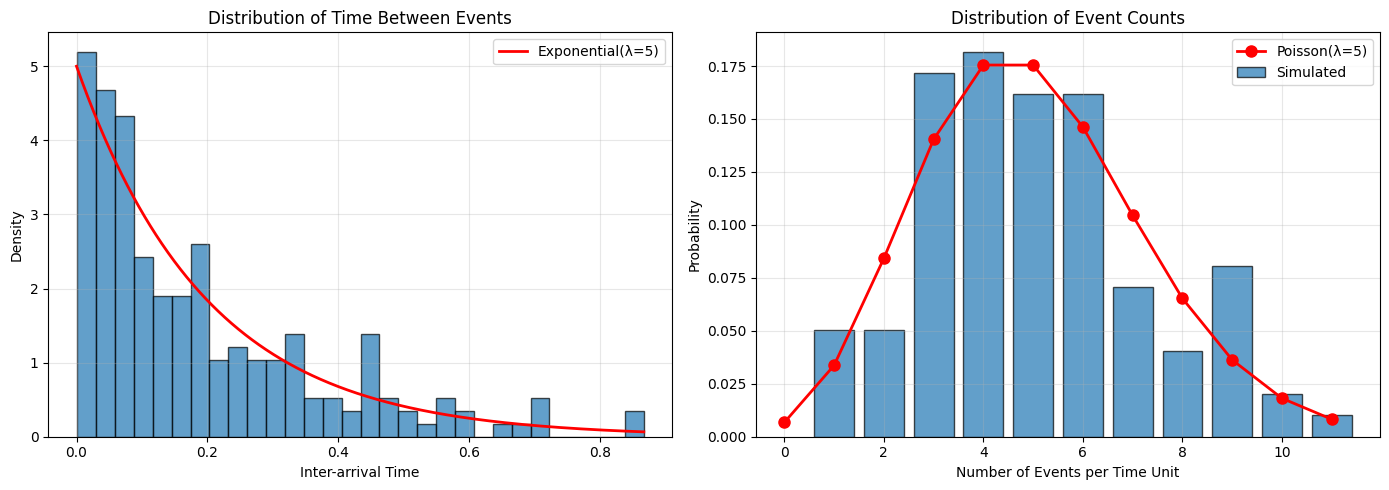

Average inter-arrival time (simulated): 0.1945
Theoretical mean for Exponential(λ=5): 0.2000

Average events per time unit (simulated): 5.0303
Theoretical mean for Poisson(λ=5): 5.0000


In [5]:
# Simulation: Poisson and Exponential Connection
np.random.seed(42)

# Parameters
lambda_rate = 5  # 5 events per unit time
time_period = 100  # Observe for 100 time units

# Generate inter-arrival times from Exponential distribution
inter_arrival_times = st.expon.rvs(scale=1/lambda_rate, size=1000)

# Calculate arrival times (cumulative sum of inter-arrival times)
arrival_times = np.cumsum(inter_arrival_times)

# Count events in each unit time interval
time_intervals = np.arange(0, time_period, 1)
events_per_interval = []
for i in range(len(time_intervals)-1):
    count = np.sum((arrival_times >= time_intervals[i]) & (arrival_times < time_intervals[i+1]))
    events_per_interval.append(count)

# Plot 1: Histogram of inter-arrival times vs Exponential PDF
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(inter_arrival_times[:200], bins=30, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(0, max(inter_arrival_times[:200]), 1000)
plt.plot(x, st.expon.pdf(x, scale=1/lambda_rate), 'r-', linewidth=2, label=f'Exponential(λ={lambda_rate})')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Density')
plt.title('Distribution of Time Between Events')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Histogram of events per interval vs Poisson PMF
plt.subplot(1, 2, 2)
unique, counts = np.unique(events_per_interval, return_counts=True)
plt.bar(unique, counts/len(events_per_interval), alpha=0.7, edgecolor='black', label='Simulated')
k = range(0, max(events_per_interval)+1)
plt.plot(k, st.poisson.pmf(k, lambda_rate), 'ro-', linewidth=2, markersize=8, label=f'Poisson(λ={lambda_rate})')
plt.xlabel('Number of Events per Time Unit')
plt.ylabel('Probability')
plt.title('Distribution of Event Counts')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average inter-arrival time (simulated): {np.mean(inter_arrival_times):.4f}")
print(f"Theoretical mean for Exponential(λ={lambda_rate}): {1/lambda_rate:.4f}")
print(f"\nAverage events per time unit (simulated): {np.mean(events_per_interval):.4f}")
print(f"Theoretical mean for Poisson(λ={lambda_rate}): {lambda_rate:.4f}")

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** A customer service center receives calls at an average rate of 12 calls per hour. Assume calls arrive according to a Poisson process. The manager wants to analyze the wait times between consecutive calls. Since the number of calls follows a Poisson distribution, the time between calls follows an exponential distribution with the same rate parameter $\lambda = 12$ calls per hour.
<html>
    <body>
        <ol>
            <li>Create an exponential distribution variable to represent the wait time (in hours) between consecutive calls.</li>
            <li>Plot both the PDF and CDF of this exponential distribution. Use an appropriate time range (e.g., 0 to 0.4 hours). Add titles and labels.</li>
            <li>Calculate the probability that the next call arrives within 5 minutes (hint: convert to hours). Also calculate the probability of waiting more than 10 minutes.</li>
            <li>The manager wants to know: 90% of the time, the next call will arrive within how many minutes? Use the <code>.ppf()</code> method to find this time threshold and verify your answer.</li>
        </ol>
    </body>
</html>

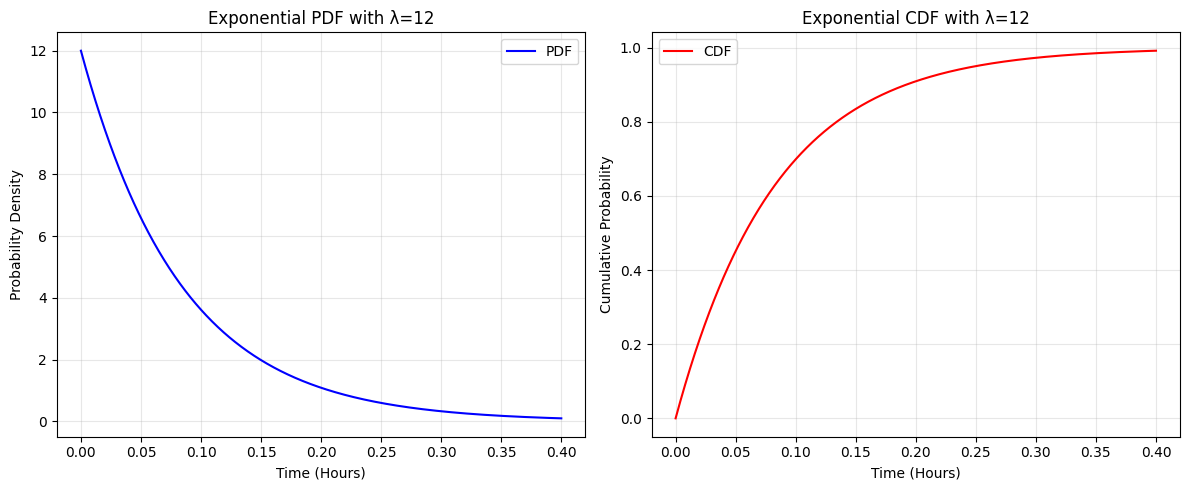

Probability of waiting less than 5 minutes: 0.6321
Probability of waiting more than 10 minutes: 0.1353
Time to wait to be 90% sure of an event: 11.51 minutes


In [8]:
### Your Code Here ###
lam = 12
T = st.expon(scale = 1/lam)

t = np.linspace(0,0.4,1000)
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, T.pdf(t), 'b', label = 'PDF')
plt.title('Exponential PDF with λ=12')
plt.xlabel('Time (Hours)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t, T.cdf(t), 'r', label = 'CDF')
plt.title('Exponential CDF with λ=12')
plt.xlabel('Time (Hours)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

t_5 = 5 / 60
t_10 = 10 / 60
p_in_5min = T.cdf(t_5)
p_in_10min = T.cdf(t_10)

t90 = T.ppf(0.9)
print(f"Probability of waiting less than 5 minutes: {p_in_5min:.4f}")
print(f"Probability of waiting more than 10 minutes: {1 - p_in_10min:.4f}")
print(f"Time to wait to be 90% sure of an event: {t90*60:.2f} minutes")

__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** A factory produces bolts with diameters following a normal distribution $N(10, 0.5)$ mm (mean = 10 mm, standard deviation = 0.5 mm). For quality control purposes, bolts are only accepted if their diameter falls within certain limits. You need to determine appropriate acceptance criteria using quantiles.
<html>
    <body>
        <ol>
            <li>Create a normal distribution variable representing the bolt diameters. Calculate and print the median, first quartile (Q1), and third quartile (Q3) of the diameter distribution.</li>
            <li>The quality control manager wants to reject bolts that are in the smallest 5% or largest 5% of diameters. Find these two diameter cutoff values using the <code>.ppf()</code> method.</li>
            <li>What percentage of bolts have diameters between 9.5 mm and 10.5 mm? Calculate this using the CDF.</li>
            <li>Create a visualization showing the normal distribution with the acceptance region (middle 90% from question 2) shaded in green and the rejection regions shaded in red. Add vertical lines at the cutoff values and include appropriate labels.</li>
        </ol>
    </body>
</html>

Median: 10.0000
First Quartile (Q1): 9.6628
Third Quartile (Q3): 10.3372
5% cut-off low: 9.1776
5% cut-off high: 10.8224
P(9.5 <= X <= 10.5): 0.6827


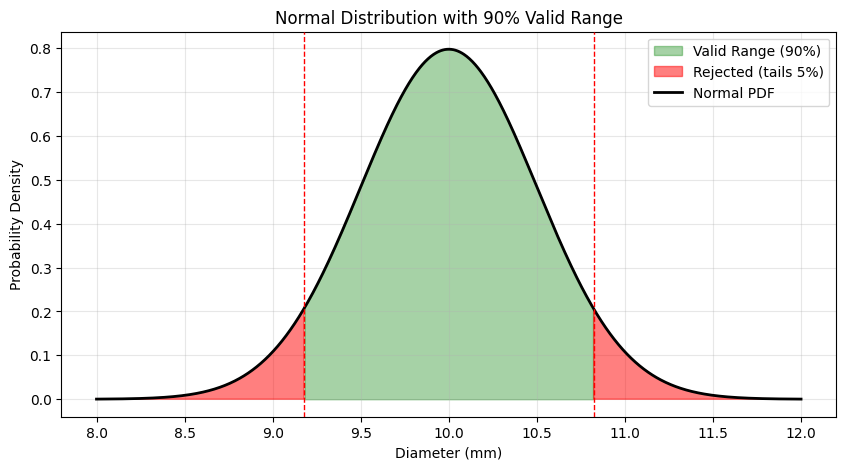

In [7]:
### Your Code Here ###
mu, sigma = 10, 0.5
D = st.norm(mu, sigma)

median = D.ppf(0.5)
q1 = D.ppf(0.25)
q3 = D.ppf(0.75)
print(f"Median: {median:.4f}")
print(f"First Quartile (Q1): {q1:.4f}")
print(f"Third Quartile (Q3): {q3:.4f}")

cut_low = D.ppf(0.05)
cut_high = D.ppf(0.95)
print(f"5% cut-off low: {cut_low:.4f}")
print(f"5% cut-off high: {cut_high:.4f}")

p_valid = D.cdf(10.5) - D.cdf(9.5)
print(f"P(9.5 <= X <= 10.5): {p_valid:.4f}")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = D.pdf(x)

plt.figure(figsize = (10, 5))
mask_valid = (x >= cut_low) & (x <= cut_high)
y_valid = np.where(mask_valid, y, np.nan)
y_reject = np.where(~mask_valid, y, np.nan)

plt.fill_between(x, 0, y_valid, color='green', alpha=0.35, label='Valid Range (90%)', zorder=1)
plt.fill_between(x, 0, y_reject, color='red', alpha=0.5, label='Rejected (tails 5%)', zorder=2)
plt.plot(x, y, 'k', lw=2, label='Normal PDF', zorder=3)

plt.axvline(cut_low,  color='red', linestyle='--', lw=1, zorder=4)
plt.axvline(cut_high, color='red', linestyle='--', lw=1, zorder=4)
plt.title('Normal Distribution with 90% Valid Range')
plt.xlabel('Diameter (mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information.